In [268]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import binarize

# Load Credit Data. Explore a Bit

In [269]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [270]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_age,32581.0,NaN,NaN,NaN,27.7346,6.348078,20.0,23.0,26.0,30.0,144.0
person_income,32581.0,NaN,NaN,NaN,66074.84847,61983.119168,4000.0,38500.0,55000.0,79200.0,6000000.0
person_home_ownership,32581,4,RENT,16446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_emp_length,31686.0,NaN,NaN,NaN,4.789686,4.14263,0.0,2.0,4.0,7.0,123.0
loan_intent,32581,6,EDUCATION,6453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_grade,32581,7,A,10777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,32581.0,NaN,NaN,NaN,9589.371106,6322.086646,500.0,5000.0,8000.0,12200.0,35000.0
loan_int_rate,29465.0,NaN,NaN,NaN,11.011695,3.240459,5.42,7.9,10.99,13.47,23.22
loan_status,32581.0,NaN,NaN,NaN,0.218164,0.413006,0.0,0.0,0.0,0.0,1.0
loan_percent_income,32581.0,NaN,NaN,NaN,0.170203,0.106782,0.0,0.09,0.15,0.23,0.83


A bunch of values, a few missing, mostly numeric. 

Here it is probably more reasonable to delete the rows where we have nulls, rather than the columns. For example, the interest rate has a few missing values, but if we are considering loans, it sounds important. 

In [271]:
df2 = df.dropna()
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_age,28638.0,NaN,NaN,NaN,27.727216,6.310441,20.0,23.0,26.0,30.0,144.0
person_income,28638.0,NaN,NaN,NaN,66649.371884,62356.447405,4000.0,39480.0,55956.0,80000.0,6000000.0
person_home_ownership,28638,4,RENT,14551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_emp_length,28638.0,NaN,NaN,NaN,4.788672,4.154627,0.0,2.0,4.0,7.0,123.0
loan_intent,28638,6,EDUCATION,5704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_grade,28638,7,A,9402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,28638.0,NaN,NaN,NaN,9656.493121,6329.683361,500.0,5000.0,8000.0,12500.0,35000.0
loan_int_rate,28638.0,NaN,NaN,NaN,11.039867,3.229372,5.42,7.9,10.99,13.48,23.22
loan_status,28638.0,NaN,NaN,NaN,0.2166,0.411935,0.0,0.0,0.0,0.0,1.0
loan_percent_income,28638.0,NaN,NaN,NaN,0.169488,0.106393,0.0,0.09,0.15,0.23,0.83


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Explore numerical with pairplot.

In [273]:
sns.pairplot(df2, hue="loan_status")

Looks like there are a few outliers. Make a simple filter to remove. 

We could also make something that filters based on X standard deviations, or similar. All the variables look roughly normal-ish, so that idea woudl be fine. We'd need to examine to decide on the threshold. 

For income, I'm going to filter at less than 1 million. It appears all the high income people have not defaulted, and based on domain knowledge, if you have a 1,000,000+ income, you can usually pay back these relatively small loans. 

In [ ]:
df2 = df2[df2["person_age"]<100]
df2 = df2[df2["person_income"]<1000000]
df2 = df2[df2["person_emp_length"]<100]

In [ ]:
#sns.pairplot(df2, hue="loan_status")

<AxesSubplot:>

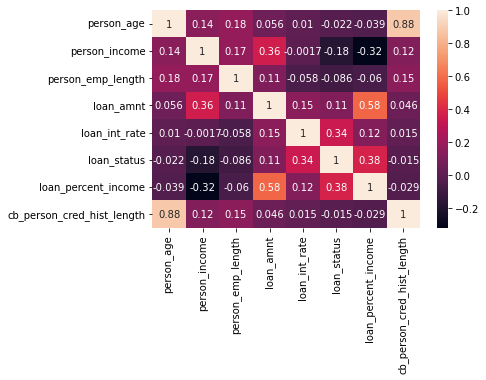

In [ ]:
sns.heatmap(df2.corr(), annot=True)

Explore categorical

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='count'>

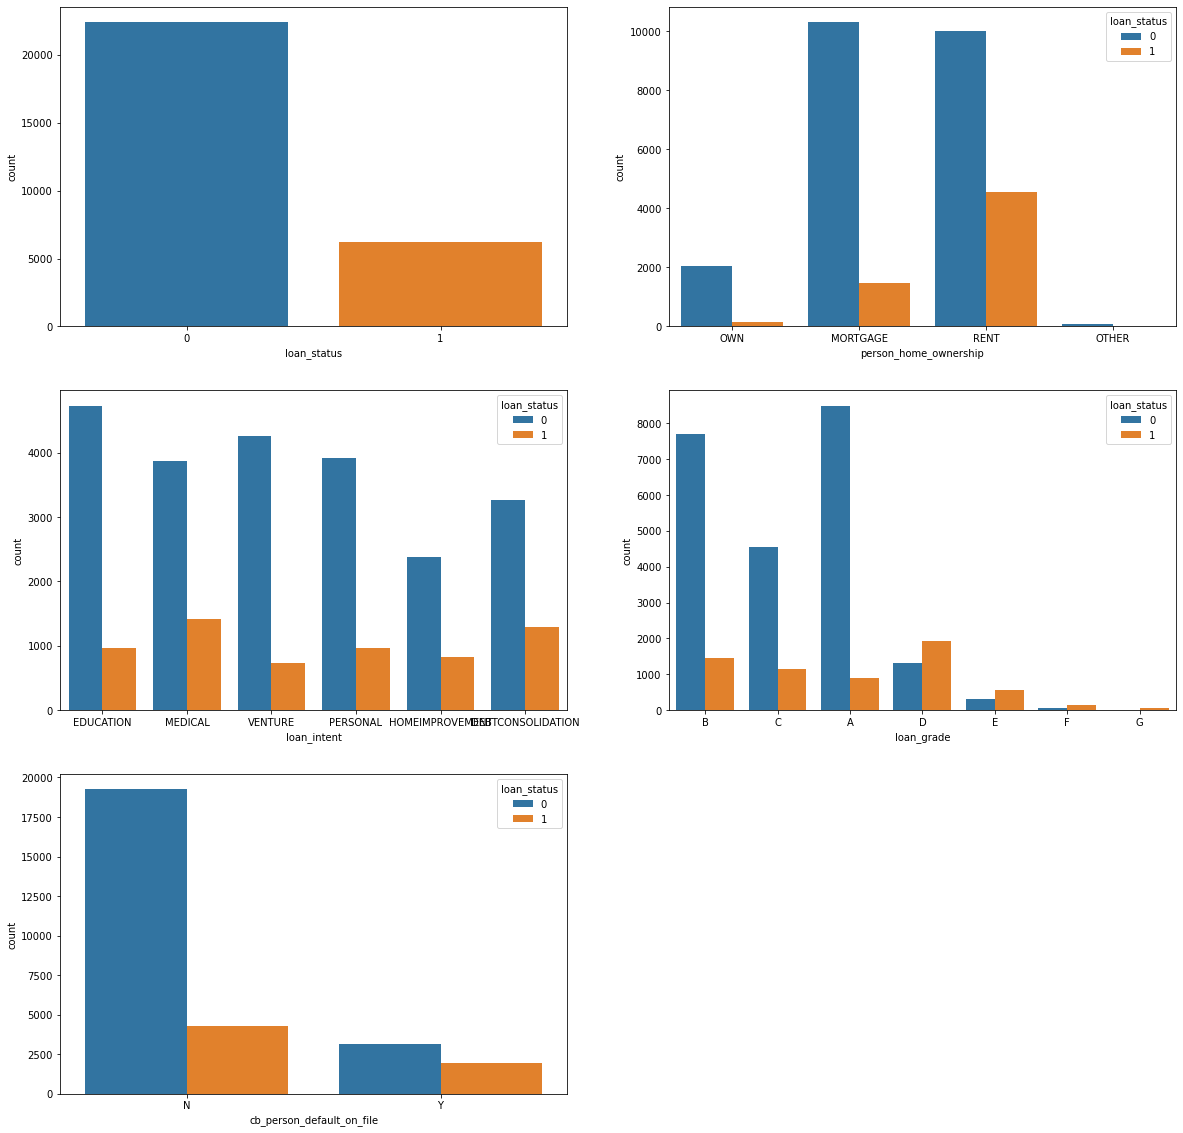

In [ ]:
plt.figure(figsize=(20, 20))
thinkplot.PrePlot(6,3,2)
sns.countplot(data=df2, x="loan_status")
thinkplot.SubPlot(2)
sns.countplot(data=df2, x="person_home_ownership", hue="loan_status")
thinkplot.SubPlot(3)
sns.countplot(data=df2, x="loan_intent", hue="loan_status")
thinkplot.SubPlot(4)
sns.countplot(data=df2, x="loan_grade", hue="loan_status")
thinkplot.SubPlot(5)
sns.countplot(data=df2, x="cb_person_default_on_file", hue="loan_status")

Our target is imbalanced. We also see a few trends. People who own without a mortgage almost never default. Loan grades that are past D default more than they don't. People are much more likely to default if there's a default on file. 

We can deal with some of this. For example, I'm going to divide the loan grade into only two groups. A through C, and D+

In [ ]:
df2["grade_2"] = df2["loan_grade"].isin(["A", "B", "C"])
df2.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,grade_2
13451,23,92000,MORTGAGE,7.0,EDUCATION,A,4800,7.49,0,0.05,N,2,True
9850,24,40000,RENT,1.0,VENTURE,B,9000,11.99,0,0.23,N,4,True
7408,22,53000,MORTGAGE,6.0,DEBTCONSOLIDATION,C,1000,15.27,0,0.02,Y,4,True
16283,25,80000,MORTGAGE,5.0,PERSONAL,A,18000,5.79,0,0.23,N,3,True
25061,28,30000,RENT,4.0,DEBTCONSOLIDATION,A,12000,6.62,1,0.40,N,7,True


In [ ]:
df2.drop(columns={"loan_grade"}, inplace=True)

In [ ]:
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_age,28626.0,NaN,NaN,NaN,27.708726,6.16648,20.0,23.0,26.0,30.0,84.0
person_income,28626.0,NaN,NaN,NaN,66125.198211,46951.228812,4000.0,39456.0,55826.0,80000.0,948000.0
person_home_ownership,28626,4,RENT,14546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_emp_length,28626.0,NaN,NaN,NaN,4.779711,4.034943,0.0,2.0,4.0,7.0,41.0
loan_intent,28626,6,EDUCATION,5701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,28626.0,NaN,NaN,NaN,9655.417278,6328.37182,500.0,5000.0,8000.0,12500.0,35000.0
loan_int_rate,28626.0,NaN,NaN,NaN,11.040068,3.229376,5.42,7.9,10.99,13.48,23.22
loan_status,28626.0,NaN,NaN,NaN,0.216656,0.411974,0.0,0.0,0.0,0.0,1.0
loan_percent_income,28626.0,NaN,NaN,NaN,0.169524,0.106346,0.0,0.09,0.15,0.23,0.83
cb_person_default_on_file,28626,2,N,23525,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most of the distributions above look pretty skewed. What if we logged them to make them more normal?

<AxesSubplot:xlabel='person_income', ylabel='Density'>

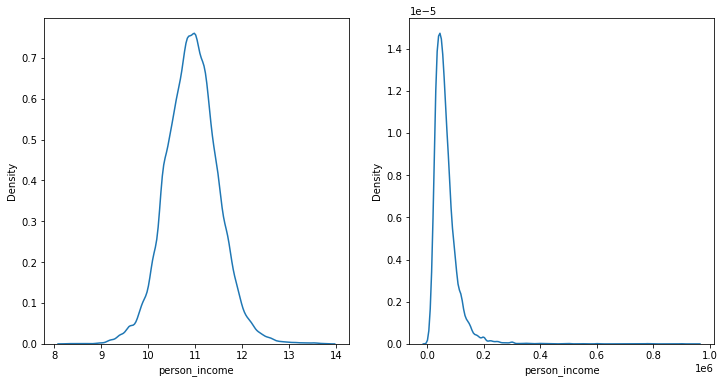

In [ ]:
thinkplot.PrePlot(2,1,2)
sns.kdeplot(x=np.log(df2.person_income))
thinkplot.SubPlot(2)
sns.kdeplot(x=df2.person_income)

We are going to log transform some varaibles. 

In [ ]:
df3 = df2.copy()

toTrans = ["person_income", "person_age", "loan_amnt", "loan_int_rate"]
for c in [c for c in df3.columns if df3[c].name in toTrans]:
    df3[c] = np.log(df3[c])

In [ ]:
sns.pairplot(df3.drop(columns={"grade_2"}))

Ok. Try to predict. 

Process categorical

In [ ]:
df3d = pd.get_dummies(df3, drop_first=True)
df3d.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,grade_2,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
1,3.044522,9.169518,5.0,6.907755,2.410542,0,0.10,2,True,0,1,0,1,0,0,0,0,0
2,3.218876,9.169518,1.0,8.612503,2.554899,1,0.57,3,True,0,0,0,0,0,1,0,0,0
3,3.135494,11.089805,4.0,10.463103,2.723267,1,0.53,2,True,0,0,1,0,0,1,0,0,0
4,3.178054,10.904119,8.0,10.463103,2.658159,1,0.55,4,True,0,0,1,0,0,1,0,0,1
5,3.044522,9.200290,2.0,7.824046,1.965713,1,0.25,2,True,0,1,0,0,0,0,0,1,0


The data is not balanced. We probably want to oversample to compensate. 

Note: I'm randomly picking an oversample method. I didn't test a bunch against each other

In [ ]:
df3d["grade_2"] = df3d["grade_2"].astype("uint8")
#df3d.info()
df3d.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,grade_2,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
1,3.044522,9.169518,5.0,6.907755,2.410542,0,0.10,2,1,0,1,0,1,0,0,0,0,0
2,3.218876,9.169518,1.0,8.612503,2.554899,1,0.57,3,1,0,0,0,0,0,1,0,0,0
3,3.135494,11.089805,4.0,10.463103,2.723267,1,0.53,2,1,0,0,1,0,0,1,0,0,0
4,3.178054,10.904119,8.0,10.463103,2.658159,1,0.55,4,1,0,0,1,0,0,1,0,0,1
5,3.044522,9.200290,2.0,7.824046,1.965713,1,0.25,2,1,0,1,0,0,0,0,0,1,0


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sampler = SMOTE()
y1 = np.array(df3d["loan_status"]).reshape(-1,1)
df3d.drop(columns={"loan_status"}, inplace=True)
x1 = np.array(df3d)

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33)
X_train_, y_train_ = sampler.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_))

Resampled dataset shape Counter({0: 15040, 1: 15040})


In [ ]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_)
X_test_norm = scaler.transform(X_test)

In [ ]:
model = LogisticRegression().fit(X_train_norm, y_train_.ravel())
predictions = model.predict(X_test_norm)
predictions = predictions.reshape(-1,1)
labels = binarize(predictions)

F1: 0.6633023819136051
Acc: 0.8234360114322007


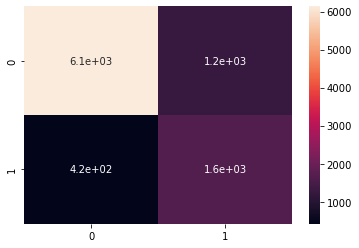

In [ ]:
conf_matrix = confusion_matrix(y_test,labels)
sns.heatmap(conf_matrix, annot=True)

print("F1:",f1_score(y_test, labels))
print("Acc:",accuracy_score(y_test, labels))